optimized a step
for class  -1 support vectors might be  [1 7] : 4.8
for class  -1 support vectors might be  [2 8] : 4.8
for class  -1 support vectors might be  [3 8] : 4.0
for class  1 support vectors might be  [5 1] : 3.2
for class  1 support vectors might be  [ 6 -1] : 5.6
for class  1 support vectors might be  [7 3] : 3.2
optimized a step
for class  -1 support vectors might be  [1 7] : 1.52
for class  -1 support vectors might be  [2 8] : 1.52
for class  -1 support vectors might be  [3 8] : 1.2
for class  1 support vectors might be  [5 1] : 1.68
for class  1 support vectors might be  [ 6 -1] : 2.64
for class  1 support vectors might be  [7 3] : 1.68
optimized a step
for class  -1 support vectors might be  [1 7] : 1.224
for class  -1 support vectors might be  [2 8] : 1.224
for class  -1 support vectors might be  [3 8] : 1.0
for class  1 support vectors might be  [5 1] : 1.016
for class  1 support vectors might be  [ 6 -1] : 1.688
for class  1 support vectors might be  [7 3] : 1.016


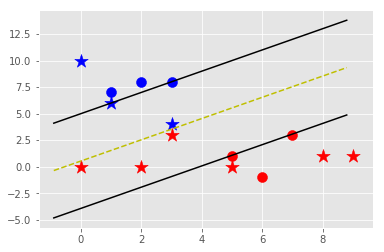

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if(self.visualization):
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self, data):
        '''
        train the model
        '''
        self.data = data
        # { ||w|| : [w, b] }
        opt_dict = {}
        transforms = [[1, 1],
                     [-1, 1],
                     [-1, -1],
                     [1, -1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense
                      self.max_feature_value * 0.001]
        
        # extremely expensive
        b_range_multiple = 5
        
        # we don't need to take as small of steps as with w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            # we can do this because its a convex problem
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # this is the weakest link in svm
                        # yi(xi.w + b) >= 1
                        for yi in self.data:
                            for xi in self.data[yi]:
                                if not yi*(np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < 0:
                    optimized = True
                    print ("optimized a step")
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
            
            for yi in self.data:
                for xi in self.data[yi]:
                    print('for class ',yi, 'support vectors might be ', xi, ':', yi*(np.dot(self.w, xi)+self.b))
            
    
    def predict(self, features):
        '''
        Predict the class of the input feature
        '''
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)        
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hperplane = x.w+b
        # v = x.w + b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x, w, b, v):
            '''
            x,y is an unknown point on the hyperplane
            x_v and w_v are the vector
            x_v= [x,y]
            x_v.w_v+b =1 for postive sv
            x.w[0] + y.w[1] + b =1 
            y = -x.w[0] - b + 1 / w[1]
            
            so basically, given a x value,
            it returns y value
            '''
            return (-w[0]*x - b + v) / w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # w.x + v = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)

        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        
        # w.x + v = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)

        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        
        # w.x + v = 0
        # decision boundry hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)

        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()
             
        
data_dict = {-1 : np.array([[1, 7], [2, 8], [3, 8]]),
            1: np.array([[5, 1], [6, -1], [7, 3]])
            }

svm = Support_Vector_Machine()
svm.fit(data = data_dict)

predict_data = [[0,10],[3,4],[1,6],[8,1],[9,1],
                [5,0],[0,0],[2,0],[3,3]]

for p in predict_data:
    svm.predict(p)

svm.visualize()

